<a href="https://colab.research.google.com/github/alvinadar/ANN-Saturday-8Pm/blob/main/Lesson_64_4_ANN_Basic_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Predicting Cancer using ANN

`Datasouce `: https://www.kaggle.com/datasets/iamtanmayshukla/breast-cancer-diagnostic-data-set

#In this data we are going to predict the dignosis

#Type of dignosis

`Malignant (M):`
* Cancerous: Malignant tumors are composed of cancerous cells.

* Invasive: They can invade and destroy nearby healthy tissues.

* Metastatic: Malignant tumors can spread to other parts of the body through the bloodstream or lymphatic system, forming secondary tumors (metastases).

* Can be life-threatening: Due to their ability to spread and invade, malignant tumors can be life-threatening if not treated.

`Benign (B):`
* Noncancerous: Benign tumors are not cancerous.

* Non-invasive: They do not invade surrounding tissues or spread to other parts of the body.

* Generally not life-threatening: While some benign tumors can cause problems due to their size or location, they are not typically life-threatening.

* Slow growth: Benign tumors tend to grow slowly and may not require treatment.

`Note : Some of the techniques from machine learning will be utilized here and skippping machine learning directly to deep learning is a bad idea.`

In [1]:
import tensorflow as tf#Import the core tensorflow library
from tensorflow import keras#Import the Keras API, whihx is now the official high-level API for building and training deep learning models in Tensorflow
from tensorflow.keras import layers
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib as plt
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import pandas as pd

#Load the dataset

In [2]:
df = pd.read_csv("/content/Breast Cancer Wisconsin 2.csv")

#Evaluate the data

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#Get len of the columns

In [4]:
len(df.columns)#We have a total of 32 columns which is quite huge

32

#Get the overall infomation of the data

In [5]:
df.info()#only 569 rows of data, quite reasonable
#Based on the info id may not be required for model training
#Diagnosis may beed to be converted to binary as the existing data is still a string

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

#Check for missing values

In [6]:
df.isnull().sum()#Based on the observation there are no missing values

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


#Drop the ID column

In [7]:
df.drop(columns=['id'],inplace=True)

#Convert diagnosis to binary

In [8]:
#Recap -> Label Encoder
#It will randomly assign the number to a category
#For medical data we cannot randomly assign the number
#What if LabelEncoder , categorize the values as such
#M-> 0
#B-> 1
#Based on this there is a potential miss dignosis , which could be very very dangerous


#Since this is a medical dignosis , we need to be carefull not to randomly convert the labels
#In this case we use map instead of label encoders to convert the dignosis to the numerical value

df['diagnosis'] = df['diagnosis'].map({"M":1,"B":0})

df['diagnosis']

,diagnosis
0,1
1,1
2,1
3,1
4,1
...,...
564,1
565,1
566,1
567,1


#Create the features and the target

In [9]:
X = df.drop('diagnosis',axis = 1)#Input
y = df['diagnosis']#Output

#Split the dataset

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Normalize the data

`Note: In Machine Learning we used StandardScaler, howerver in Neural Networks depending on the activation function we need to choose the correct scaling to cater for outliers`

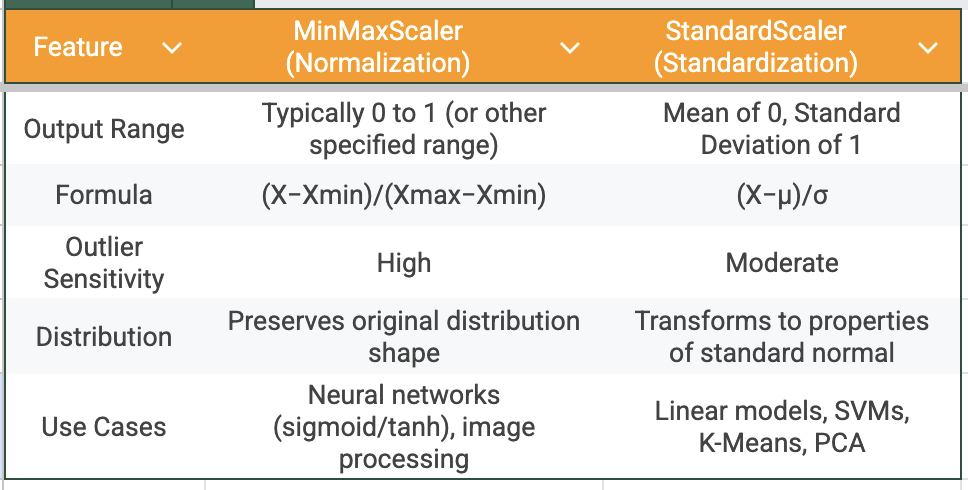

In [11]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Build the model

In [12]:
input_dim = X_train_scaled.shape[1]

input_dim

30

#Creating the neural network

`1 -> Input layer and the hidden layer`

`2 -> Output layer`

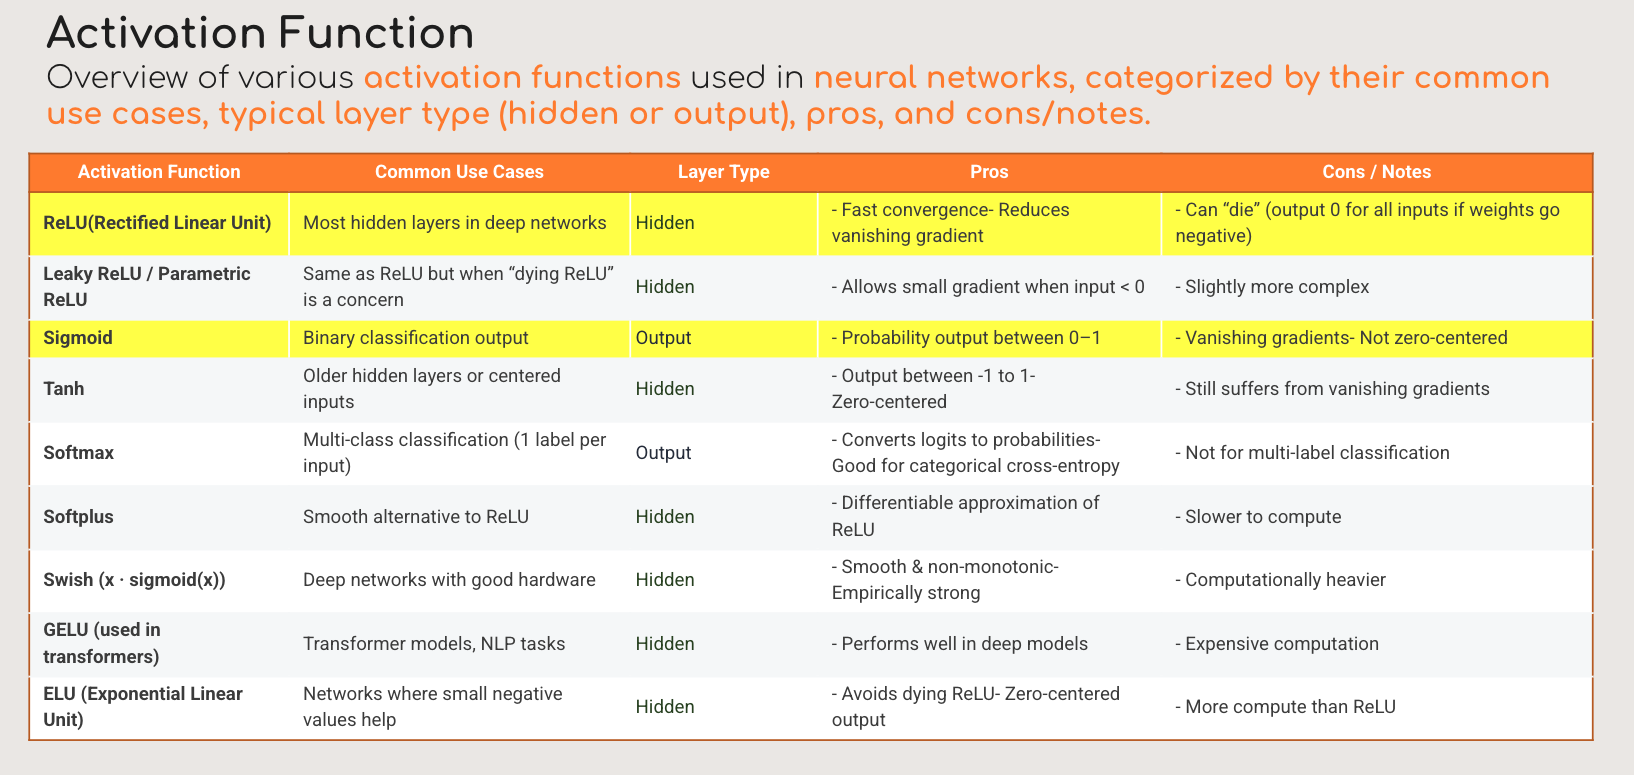

In [13]:
model = keras.Sequential([
    #Create the input and the hidden layer
    layers.Dense(units = input_dim,activation = "relu",input_shape = [input_dim]),
    layers.Dense(units=1,activation = 'sigmoid')#Since we are going to predict a binary classification output
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#Compile the model

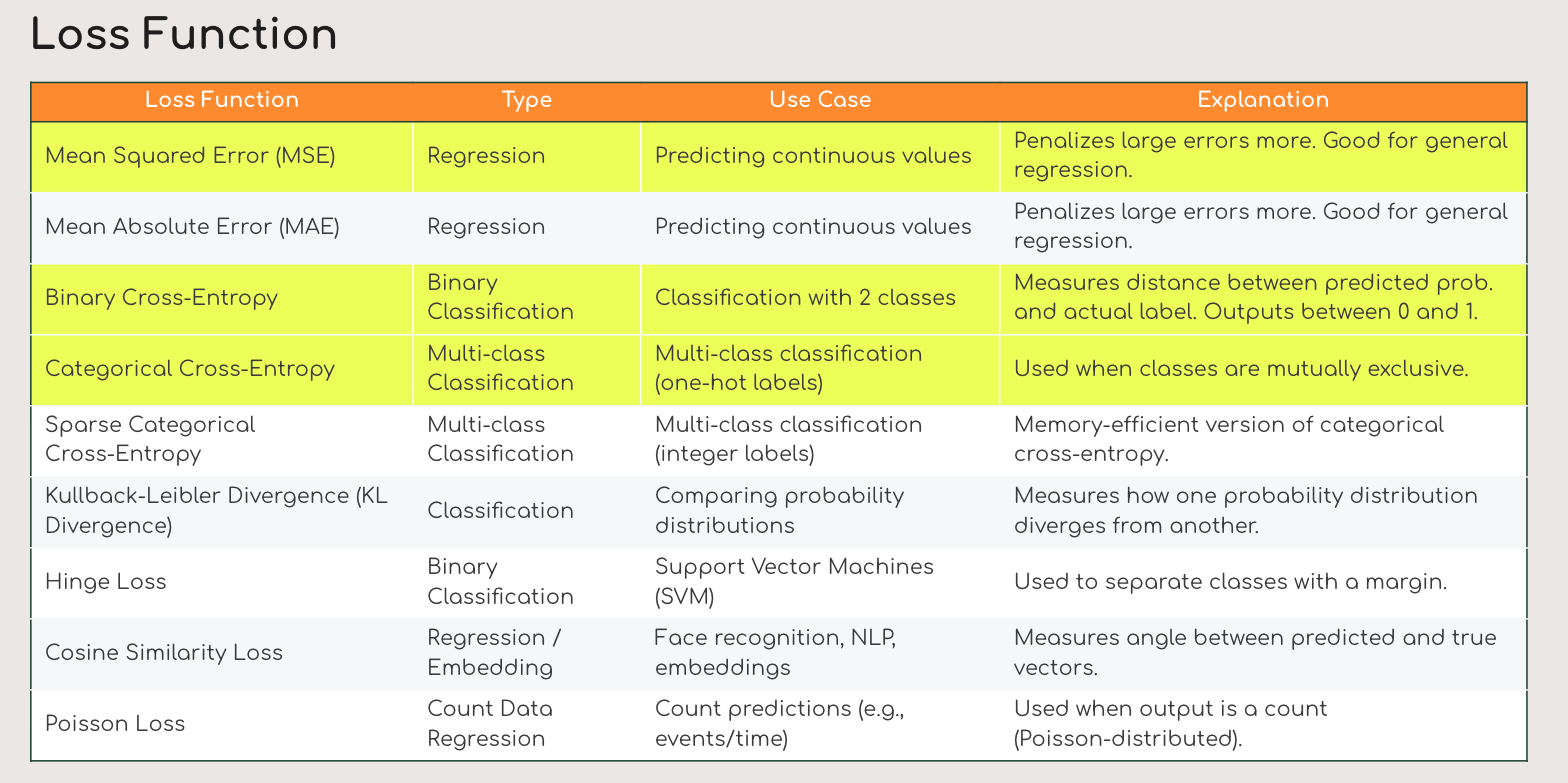


In [14]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# Train the model

#Epoch

* An "epoch" is one complete pass through the entire training dataset.

* Setting epochs=100 means the training algorithm will iterate over all the training examples 100 times.

* During each epoch, the model updates its internal weights and biases based on the errors it makes on the training data.

#Batch Size

* A "batch" is a subset of the training data that is used in one iteration of training.

* Setting batch_size=32 means that the training data will be divided into chunks of 32samples. The model's weights will be updated after processing each batch of 32 samples, rather than after processing all training samples (which would be batch_size = len(X_train_scaled)).

`To make your model to train fast , you can increase the batch size`

#Validation split

* This is an important parameter for monitoring the model's performance during training and detecting overfitting.

* It tell the fit method to allocate serveral data from the training data as a validation data.

* validation_slit = 0.2 means 20% of the X_train_scaled and y_train data will be used for validation and reminging 80 % will be used for accual training.

In [15]:
created_model = model.fit(X_train_scaled,y_train,epochs = 100,batch_size = 32,validation_split=0.2)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.4584 - loss: 0.6912 - val_accuracy: 0.6374 - val_loss: 0.6754
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6435 - loss: 0.6684 - val_accuracy: 0.8022 - val_loss: 0.6564
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8444 - loss: 0.6490 - val_accuracy: 0.8901 - val_loss: 0.6380
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8704 - loss: 0.6345 - val_accuracy: 0.8791 - val_loss: 0.6190
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8664 - loss: 0.6126 - val_accuracy: 0.8791 - val_loss: 0.5977
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8886 - loss: 0.5867 - val_accuracy: 0.8901 - val_loss: 0.5748
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8951 - loss: 0.5736 - val_accuracy: 0.8681 - val_loss: 0.5513
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9033 - loss: 0.5397 - val_accuracy: 0.8901 - 

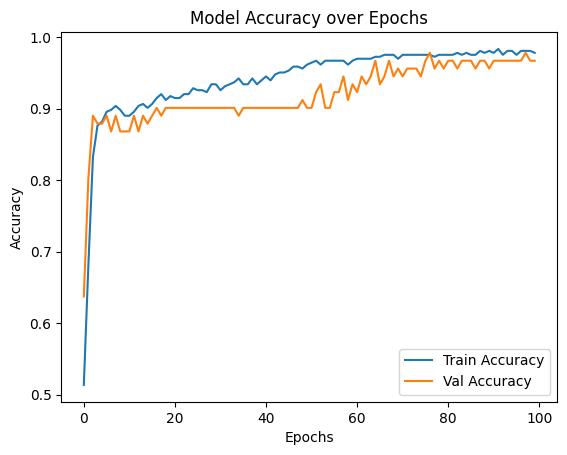

In [16]:
# Plot accuracy
import matplotlib.pyplot as plt # Import pyplot
plt.plot(created_model.history['accuracy'], label='Train Accuracy') # Access history correctly
plt.plot(created_model.history['val_accuracy'], label='Val Accuracy') # Access history correctly
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



`Diagnosis: Overfitting`

The most prominent issue indicated by this plot is overfitting. Here's why:

* Training Accuracy >> Validation Accuracy: The model performs exceptionally well on the data it has seen during training, but its performance drops when evaluated on unseen validation data. This means it's memorizing the training data too well, including its noise and specific patterns, rather than learning generalized features.

* Validation Accuracy stagnant while Training Accuracy Continues High: While the training accuracy stays almost perfect, the validation accuracy doesn't significantly improve after the initial few epochs (around epoch 5-10). It oscillates but doesn't consistently rise to meet the training accuracy. This is a classic sign that the model is no longer generalizing better but is instead becoming more specialized to the training set.

* High Fluctuations in Validation Accuracy: The choppiness of the validation accuracy line suggests that the model's ability to perform on unseen data is unstable. This can happen if the model is too complex for the amount of data, or if the validation set itself is small, leading to more variance in the metric.

#Accuarcy
* Refers to trianing accuracy

#Val Accuracy
* This accuracy is set aside for validation , the model did not train on this data.

`Based on the validation accuracy we can identify if the model is effectively able to work on unseen data with this we can identify if the model is overfitted or not. `

#Evaluate the model

In [17]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"\nTest Accuracy: {accuracy:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9759 - loss: 0.0842

Test Accuracy: 0.9737


In [18]:
# Predict
y_pred = (model.predict(X_test_scaled)>0.5 ).astype("int32")
#Any probability score greater than 0.5 is evaluated as True.
#For normal binary classification the set threshold is 0.5 , you can refer to logistics regression notes for details

# Show metrics
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

Confusion Matrix:
[[70  1]
 [ 2 41]]


In [19]:
display_cm = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred),display_labels=y.unique())

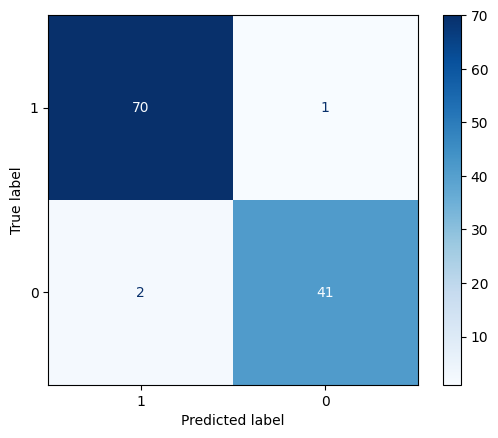

In [20]:
display_cm.plot(cmap="Blues")

#Predicting New Data

In [21]:
new_sample = [[14.0, 20.0, 90.0, 600.0, 0.1, 0.15, 0.2, 0.1, 0.2, 0.07,
               0.3, 1.0, 2.0, 25.0, 0.007, 0.02, 0.03, 0.01, 0.02, 0.005,
               16.0, 25.0, 100.0, 800.0, 0.12, 0.25, 0.3, 0.15, 0.3, 0.08]]

#Preprocess the new samples

In [22]:
new_samples_scaled = scaler.transform(new_sample)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


#Predict with the trained model

In [23]:
# Predict
prediction = model.predict(new_samples_scaled)
prediction_label = (prediction > 0.5).astype("int32")

# Interpret the result
if prediction_label[0][0] == 1:
    print("Prediction: Malignant (Cancerous)")
else:
    print("Prediction: Benign (Non-cancerous)")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Prediction: Malignant (Cancerous)
